In [1]:
import json
import os
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt

datasets = ['reddit', 'wiki']
master_dict = {}

for i in datasets:
  __file__ = os.path.abspath('')
  path = '/mnt/raid0nvme1/zz/cache_data/' + i
  path = './results/' + i
  print(path)

  startName = path + "/corr_sample/meta_" + i + "_subset_50.0Cache_"
  if (i == 'taobao'):
     startName = path + "/meta_" + i + "_subset_1.0Cache_"
  if (i == 'overflow'):
     startName = path + "/static_test/meta_" + i + "_subset_3.0Cache_"
  endName = "Size_10_5.json"

  fileNames = [startName + str(i) + endName for i in [2,5,10,20,40,60,80]]
  res = []
  for j in fileNames:
      with open(j) as json_file:
        data = json.load(json_file)
        res.append((data['LRUAccuracy'], data['StaticAccuracy'], data['LFUAccuracy'], data['ARCAccuracy'], data['LFUImpAccuracy']))
  master_dict[i] = res

./results/reddit
./results/wiki


In [2]:
import numpy as np
import matplotlib.pyplot as plt

xs = [2, 5, 10, 20, 40, 60, 80]

# Reddit
reddit_LRUAccuracy = [i[0] for i in master_dict['reddit']]
reddit_LFUAccuracy = [i[2] for i in master_dict['reddit']]
reddit_ARCAccuracy = [i[3] for i in master_dict['reddit']]
reddit_StaticAccuracy = [i[1] for i in master_dict['reddit']]
reddit_LFUImpAccuracy = [i[4] for i in master_dict['reddit']]

# Wiki
wiki_LRUAccuracy = [i[0] for i in master_dict['wiki']]
wiki_LFUAccuracy = [i[2] for i in master_dict['wiki']]
wiki_ARCAccuracy = [i[3] for i in master_dict['wiki']]
wiki_StaticAccuracy = [i[1] for i in master_dict['wiki']]
wiki_LFUImpAccuracy = [i[4] for i in master_dict['wiki']]

Text(0, 0.5, 'Cache hit ratio %')

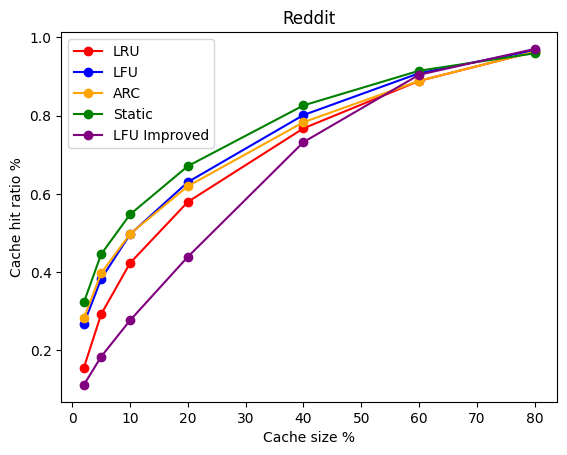

In [3]:
plt.plot(xs, reddit_LRUAccuracy, 'o-', color='red', label="LRU")
plt.plot(xs, reddit_LFUAccuracy, 'o-', color='blue', label="LFU")
plt.plot(xs, reddit_ARCAccuracy, 'o-', color='orange', label="ARC")
plt.plot(xs, reddit_StaticAccuracy, 'o-', color='green', label="Static")
plt.plot(xs, reddit_LFUImpAccuracy, 'o-', color='purple', label="LFU Improved")
plt.legend()
plt.title("Reddit")
plt.xlabel('Cache size %')
plt.ylabel('Cache hit ratio %')

Text(0, 0.5, 'Cache hit ratio %')

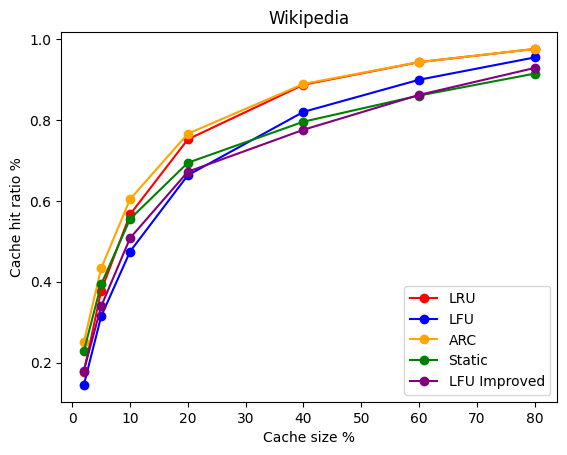

In [4]:
plt.plot(xs, wiki_LRUAccuracy, 'o-', color='red', label="LRU")
plt.plot(xs, wiki_LFUAccuracy, 'o-', color='blue', label="LFU")
plt.plot(xs, wiki_ARCAccuracy, 'o-', color='orange', label="ARC")
plt.plot(xs, wiki_StaticAccuracy, 'o-', color='green', label="Static")
plt.plot(xs, wiki_LFUImpAccuracy, 'o-', color='purple', label="LFU Improved")
plt.legend()
plt.title("Wikipedia")
plt.xlabel('Cache size %')
plt.ylabel('Cache hit ratio %')